In [2]:
import csv
import re
import pandas as pd 
import string
import spacy
import glob
import os
os.getcwd()
os.chdir("/home/matthew/anaconda3/envs/insight/staycationLA/data/raw")

In [4]:

extension = 'csv'
all_filenames = [i for i in glob.glob('reviews_LA_*.{}'.format(extension))]
len(all_filenames)

3391

In [227]:
#combine all files in the list
li = []

for filename in all_filenames:
    df = pd.read_csv(filename, index_col=None, names=['stars', 'title', 'text', 'user', 'url'])
    data=re.split("_|.csv",filename)
    data2=data[1:-1]
    attraction_name='_'.join(data2)
    df['attraction'] = attraction_name
    li.append(df)

complete = pd.concat(li, axis=0, ignore_index=True)
complete = complete.drop_duplicates()
len(complete)

299759

In [228]:
complete

stars                                              title text user  \
0         50                                   Perfect location  NaN  NaN   
1         30  Representative of the many beaches in Southern...  NaN  NaN   
2         50                                          So quiet!  NaN  NaN   
3         40                                      Topanga beach  NaN  NaN   
4         40                            This is NOT a dog beach  NaN  NaN   
...      ...                                                ...  ...  ...   
329366    40                                Very Nice and Quiet  NaN  NaN   
329367    50                      Best place to shop in Burbank  NaN  NaN   
329368    50                                               Wow!  NaN  NaN   
329369    50                                Beautiful Old Venue  NaN  NaN   
329370    50                   One of the oldest theatres in LA  NaN  NaN   

                                                      url  \
0       https://www.tripadvisor.com/Profile/Adventure6...   
1       https://www.tripadvisor.com/Profile/JoeFlynnLa...   
2       https://www.tripadvisor.com/Profile/LelaLovesT...   
3        https://www.tripadvisor.com/Profile/alexgQ2787RW   
4            https://www.tripadvisor.com/Profile/rdef2015   
...                                                   ...   
329366         https://www.tripadvisor.com/Profile/f4rags   
329367        https://www.tripadvisor.com/Profile/Bianxdr   
329368      https://www.tripadvisor.com/Profile/833kathiv   
329369      https://www.tripadvisor.com/Profile/EllenH602   
329370         https://www.tripadvisor.com/Profile/permia   

                               attraction  
0               LA_usernamesTopanga_Beach  
1               LA_usernamesTopanga_Beach  
2               LA_usernamesTopanga_Beach  
3               LA_usernamesTopanga_Beach  
4               LA_usernamesTopanga_Beach  
...                                   ...  
329366  LA_usernamesBurbank_Empire_Center  
329367  LA_usernamesBurbank_Empire_Center  
329368  LA_usernamesBurbank_Empire_Center  
329369         LA_usernamesPalace_Theatre  
329370         LA_usernamesPalace_Theatre  

[299759 rows x 6 columns]

In [230]:
complete['attraction'] = complete['attraction'].str.replace('LA_usernames', '')
complete['user'] = complete['user'].str.replace('https://www.tripadvisor.com/Profile/', '') 
complete['url'] = complete['url'].str.replace('https://www.tripadvisor.com/Profile/', '') 
complete['attraction'] = complete['attraction'].str.replace('LA_', '')
complete['attraction'] = complete['attraction'].str.replace('_url', '')

In [231]:
complete


stars                                              title text user  \
0         50                                   Perfect location  NaN  NaN   
1         30  Representative of the many beaches in Southern...  NaN  NaN   
2         50                                          So quiet!  NaN  NaN   
3         40                                      Topanga beach  NaN  NaN   
4         40                            This is NOT a dog beach  NaN  NaN   
...      ...                                                ...  ...  ...   
329366    40                                Very Nice and Quiet  NaN  NaN   
329367    50                      Best place to shop in Burbank  NaN  NaN   
329368    50                                               Wow!  NaN  NaN   
329369    50                                Beautiful Old Venue  NaN  NaN   
329370    50                   One of the oldest theatres in LA  NaN  NaN   

                       url             attraction  
0          Adventure627194          Topanga_Beach  
1        JoeFlynnLaPlataMD          Topanga_Beach  
2       LelaLovesTraveling          Topanga_Beach  
3             alexgQ2787RW          Topanga_Beach  
4                 rdef2015          Topanga_Beach  
...                    ...                    ...  
329366              f4rags  Burbank_Empire_Center  
329367             Bianxdr  Burbank_Empire_Center  
329368           833kathiv  Burbank_Empire_Center  
329369           EllenH602         Palace_Theatre  
329370              permia         Palace_Theatre  

[299759 rows x 6 columns]

In [232]:
df = complete[complete.isna().any(axis=1)]
df

stars                                              title text user  \
0         50                                   Perfect location  NaN  NaN   
1         30  Representative of the many beaches in Southern...  NaN  NaN   
2         50                                          So quiet!  NaN  NaN   
3         40                                      Topanga beach  NaN  NaN   
4         40                            This is NOT a dog beach  NaN  NaN   
...      ...                                                ...  ...  ...   
329366    40                                Very Nice and Quiet  NaN  NaN   
329367    50                      Best place to shop in Burbank  NaN  NaN   
329368    50                                               Wow!  NaN  NaN   
329369    50                                Beautiful Old Venue  NaN  NaN   
329370    50                   One of the oldest theatres in LA  NaN  NaN   

                       url             attraction  
0          Adventure627194          Topanga_Beach  
1        JoeFlynnLaPlataMD          Topanga_Beach  
2       LelaLovesTraveling          Topanga_Beach  
3             alexgQ2787RW          Topanga_Beach  
4                 rdef2015          Topanga_Beach  
...                    ...                    ...  
329366              f4rags  Burbank_Empire_Center  
329367             Bianxdr  Burbank_Empire_Center  
329368           833kathiv  Burbank_Empire_Center  
329369           EllenH602         Palace_Theatre  
329370              permia         Palace_Theatre  

[299759 rows x 6 columns]

In [233]:
complete2=complete
complete2=complete2.groupby(['stars','title']).first().reset_index()
complete2

stars                                title  \
0          10                          !¡ what?!¡¿   
1          10            "Catalina Botanic Garden"   
2          10                         "NOT For US"   
3          10                   "Once" too much...   
4          10  "Supernatural" ghost tour not super   
...       ...                                  ...   
147337     50                                🛍 🛍 🛍   
147338     50                                   🤔💭   
147339     50                                 🤟🏼✅✅   
147340     50                                   🤡🤔   
147341     50                                    🥰   

                                                     text                user  \
0       This is an attraction??? An old theater in a n...   CarmichaelVentura   
1       I am not sure what my wife and I expected on C...           MakeCandy   
2       To say the least we hated this place, from the...      chopperprice71   
3       Took my girlfriend to closing night show of "O...             HalW423   
4       The ship has a wonderful history, especially w...      BCSunflower777   
...                                                   ...                 ...   
147337  Nice street where you can find all high end br...  Emirati Vacationer   
147338  🤔💭,become whatever you want to become before w...          alfredb971   
147339  I love this place mainly because it has lots o...  Emirati Vacationer   
147340  The most interesting collection of people. A w...        jeanhV5194YE   
147341  Great outside mall. They have great stores and...           Krissyalx   

                      url                           attraction  
0       CarmichaelVentura                        Vista_Theater  
1               MakeCandy      Wrigley_Memorial_Botanic_Garden  
2          chopperprice71               Hollywood_Walk_of_Fame  
3                     NaN                     Pantages_Theatre  
4          BCSunflower777                       The_Queen_Mary  
...                   ...                                  ...  
147337  EmiratiVacationer                          Rodeo_Drive  
147338         alfredb971  Off_Track_Betting_at_Hollywood_Park  
147339  EmiratiVacationer               Third_Street_Promenade  
147340                NaN                    Santa_Monica_Pier  
147341                NaN                            The_Grove  

[147342 rows x 6 columns]

In [234]:
complete2.url.fillna(complete2.user, inplace=True)
complete2

stars                                title  \
0          10                          !¡ what?!¡¿   
1          10            "Catalina Botanic Garden"   
2          10                         "NOT For US"   
3          10                   "Once" too much...   
4          10  "Supernatural" ghost tour not super   
...       ...                                  ...   
147337     50                                🛍 🛍 🛍   
147338     50                                   🤔💭   
147339     50                                 🤟🏼✅✅   
147340     50                                   🤡🤔   
147341     50                                    🥰   

                                                     text                user  \
0       This is an attraction??? An old theater in a n...   CarmichaelVentura   
1       I am not sure what my wife and I expected on C...           MakeCandy   
2       To say the least we hated this place, from the...      chopperprice71   
3       Took my girlfriend to closing night show of "O...             HalW423   
4       The ship has a wonderful history, especially w...      BCSunflower777   
...                                                   ...                 ...   
147337  Nice street where you can find all high end br...  Emirati Vacationer   
147338  🤔💭,become whatever you want to become before w...          alfredb971   
147339  I love this place mainly because it has lots o...  Emirati Vacationer   
147340  The most interesting collection of people. A w...        jeanhV5194YE   
147341  Great outside mall. They have great stores and...           Krissyalx   

                      url                           attraction  
0       CarmichaelVentura                        Vista_Theater  
1               MakeCandy      Wrigley_Memorial_Botanic_Garden  
2          chopperprice71               Hollywood_Walk_of_Fame  
3                 HalW423                     Pantages_Theatre  
4          BCSunflower777                       The_Queen_Mary  
...                   ...                                  ...  
147337  EmiratiVacationer                          Rodeo_Drive  
147338         alfredb971  Off_Track_Betting_at_Hollywood_Park  
147339  EmiratiVacationer               Third_Street_Promenade  
147340       jeanhV5194YE                    Santa_Monica_Pier  
147341          Krissyalx                            The_Grove  

[147342 rows x 6 columns]

In [236]:
#df3= complete2[complete2.isna().any(axis=1)]
#df3

In [237]:
complete2.user.fillna(complete2.url, inplace=True)
df3= complete2[complete2.isna().any(axis=1)]
df3

stars                                              title  \
102        10                                   A rip-off-o-rama   
273        10                                 Awful Tourist Trap   
274        10                                        Awful Visit   
404        10                                  Big waste of time   
449        10                             Burned by the Skyslide   
...       ...                                                ...   
147092     50                                       what a view!   
147138     50                                        wonderful !   
147205     50                                worth a short visit   
147222     50                                     worth the hike   
147294     50  “Like the station, Now I CAN stand the regular...   

                                                     text           user  \
102                                                   NaN    Arthurascii   
273                                                   NaN     teachlausd   
274                                                   NaN    Flyer360962   
404                                                   NaN    JoshHundley   
449                                                   NaN      borisr457   
...                                                   ...            ...   
147092                                                NaN        hesterp   
147138                                                NaN        hohsien   
147205                                                NaN  Consultantgal   
147222  An absolute must. It is a very cool thing to d...            NaN   
147294  So sorry. Forgot that I wrote a review during ...            NaN   

                  url                   attraction  
102       Arthurascii              OUE_Skyspace_LA  
273        teachlausd                Olvera_Street  
274       Flyer360962               Del_Cerro_Park  
404       JoshHundley              The_Gentle_Barn  
449         borisr457              OUE_Skyspace_LA  
...               ...                          ...  
147092        hesterp              OUE_Skyspace_LA  
147138        hohsien                Olvera_Street  
147205  Consultantgal  Los_Angeles_Central_Library  
147222            NaN               Hollywood_Sign  
147294            NaN                Union_Station  

[2028 rows x 6 columns]

In [238]:
complete2['user']= complete2['url']

In [239]:
complete3 = complete2.drop(['url'], axis=1)
complete3 = complete3.drop_duplicates()
complete3

stars                                title  \
0          10                          !¡ what?!¡¿   
1          10            "Catalina Botanic Garden"   
2          10                         "NOT For US"   
3          10                   "Once" too much...   
4          10  "Supernatural" ghost tour not super   
...       ...                                  ...   
147337     50                                🛍 🛍 🛍   
147338     50                                   🤔💭   
147339     50                                 🤟🏼✅✅   
147340     50                                   🤡🤔   
147341     50                                    🥰   

                                                     text               user  \
0       This is an attraction??? An old theater in a n...  CarmichaelVentura   
1       I am not sure what my wife and I expected on C...          MakeCandy   
2       To say the least we hated this place, from the...     chopperprice71   
3       Took my girlfriend to closing night show of "O...            HalW423   
4       The ship has a wonderful history, especially w...     BCSunflower777   
...                                                   ...                ...   
147337  Nice street where you can find all high end br...  EmiratiVacationer   
147338  🤔💭,become whatever you want to become before w...         alfredb971   
147339  I love this place mainly because it has lots o...  EmiratiVacationer   
147340  The most interesting collection of people. A w...       jeanhV5194YE   
147341  Great outside mall. They have great stores and...          Krissyalx   

                                 attraction  
0                             Vista_Theater  
1           Wrigley_Memorial_Botanic_Garden  
2                    Hollywood_Walk_of_Fame  
3                          Pantages_Theatre  
4                            The_Queen_Mary  
...                                     ...  
147337                          Rodeo_Drive  
147338  Off_Track_Betting_at_Hollywood_Park  
147339               Third_Street_Promenade  
147340                    Santa_Monica_Pier  
147341                            The_Grove  

[147342 rows x 5 columns]

In [240]:
# select a column as series and then convert it into a column
users = complete3['user'].to_list()
#print(users)
len(users)

147342

In [241]:
users2 = list(dict.fromkeys(users)) #remove duplicates
len(users2)

80277

In [242]:
import pickle
with open('../../data/processed/userlist_final.pkl', 'wb') as f:    #../../../ each ../ goes up one folder level
    pickle.dump(users2, f)


In [243]:
with open('../../data/processed/userlist_final.pkl', 'rb') as f:
    mynewlist = pickle.load(f)

In [244]:
len(mynewlist)

80277

In [246]:
#df2= complete3[complete3.isna().any(axis=1)]
#df2

In [247]:
#df2.head(50)

In [79]:
#export to csv
complete3.to_csv( "../processed/LA_combined_reviews.csv", index=False, encoding='utf-8-sig')

217827

146102

In [21]:
#test

In [ ]:
#now clean the data for text analysis

In [27]:
test = pd.read_csv("../processed/LA_combined_reviews.csv", index_col=None)

In [28]:
test = test[test['stars'] > 35]
test["all_text"] = test["title"] + " " + test["text"]
test2=test.drop(['stars', 'title', 'text', 'user'], axis=1)
len(test2)

127697

In [29]:
test2= test2.drop_duplicates()
len(test2)

126468

In [30]:
test2

attraction  \
28793                      The_Getty_Center   
28794                      Ahmanson_Theatre   
28795                    Airport_in_the_Sky   
28796                Hollywood_Walk_of_Fame   
28797                Catalina_Island_Casino   
...                                     ...   
156485                          Rodeo_Drive   
156486  Off_Track_Betting_at_Hollywood_Park   
156487               Third_Street_Promenade   
156488                    Santa_Monica_Pier   
156489                            The_Grove   

                                                                                                   all_text  
28793   !!! Accidentally pressed wrong key but can’t get out of this review page despite pressing Cancel...  
28794   " Ain't Too Proud Was Good " My wife and I went to Los Angeles to see the theater production of ...  
28795   " Airport On Top Of The World " We went on a tour on Catalina Island that lasted over an hour an...  
28796   " Exciting !!!!!!!! " It is very crowded walking up & down the streets of : Hollywood Blvd, I th...  
28797   " Historic Casino, Is NOT A Casino ! " My wife and I went to the Catalina Island Casino thinking...  
...                                                                                                     ...  
156485  🛍 🛍 🛍 Nice street where you can find all high end brands and where you can enjoy LA lifestyle. M...  
156486  🤔💭 🤔💭,become whatever you want to become before we become. Hollywood Park,2017 And beyond a new ...  
156487  🤟🏼✅✅ I love this place mainly because it has lots of shops and you can even just walk around. We...  
156488  🤡🤔 The most interesting collection of people. A wonderful place for a romantic outing. Great foo...  
156489  🥰 Great outside mall. They have great stores and restaurants. The fountain is beautiful and the ...  

[126468 rows x 2 columns]

In [31]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
#nltk.download('punkt')
import string
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

In [32]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = str(text) 
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = text.replace('“', '').replace('”', '').replace('"', '') 
    text = text.replace(',', ' ').replace('’', ' ')
    return text

test2['clean'] = (test2.all_text.apply(lambda x: clean_text(x)))
test2.tail(10)


attraction  \
156480                Long_Beach_Waterfront   
156481                       Palisades_Park   
156482                 Griffith_Observatory   
156483                         Venice_Beach   
156484          Universal_Studios_Hollywood   
156485                          Rodeo_Drive   
156486  Off_Track_Betting_at_Hollywood_Park   
156487               Third_Street_Promenade   
156488                    Santa_Monica_Pier   
156489                            The_Grove   

                                                                                                   all_text  \
156480  💖 Loved it very open to everything. Peaceful nice environment very friendly people. Good to just...   
156481  💙🌊🌊 Take your wife and go there for a walk and/or a photoshoot by the sea. The place is clean an...   
156482  🕵 I'm not astrologist, but don't dump to go there. If you like to learn something more about our...   
156483  😆😆😆 I love Venice Beach,all day surfing,sunshine,golden sand,beautiful ocean,walk on the oceanfr...   
156484  🙀Universal You should see it.Maybe one time, not two, but you should go there.Green screen, cele...   
156485  🛍 🛍 🛍 Nice street where you can find all high end brands and where you can enjoy LA lifestyle. M...   
156486  🤔💭 🤔💭,become whatever you want to become before we become. Hollywood Park,2017 And beyond a new ...   
156487  🤟🏼✅✅ I love this place mainly because it has lots of shops and you can even just walk around. We...   
156488  🤡🤔 The most interesting collection of people. A wonderful place for a romantic outing. Great foo...   
156489  🥰 Great outside mall. They have great stores and restaurants. The fountain is beautiful and the ...   

                                                                                                      clean  
156480  💖 loved it very open to everything  peaceful nice environment very friendly people  good to just...  
156481  💙🌊🌊 take your wife and go there for a walk and or a photoshoot by the sea  the place is clean an...  
156482  🕵 i m not astrologist  but don t dump to go there  if you like to learn something more about our...  
156483  😆😆😆 i love venice beach all day surfing sunshine golden sand beautiful ocean walk on the oceanfr...  
156484  🙀universal you should see it maybe one time  not two  but you should go there green screen  cele...  
156485  🛍 🛍 🛍 nice street where you can find all high end brands and where you can enjoy la lifestyle  m...  
156486  🤔💭 🤔💭 become whatever you want to become before we become  hollywood park  and beyond a new look...  
156487  🤟🏼✅✅ i love this place mainly because it has lots of shops and you can even just walk around  we...  
156488  🤡🤔 the most interesting collection of people  a wonderful place for a romantic outing  great foo...  
156489  🥰 great outside mall  they have great stores and restaurants  the fountain is beautiful and the ...

In [33]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u'\U00010000-\U0010ffff'
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

test2['clean2'] = (test2.clean.apply(lambda x: deEmojify(x)))
test2.tail(10)

attraction  \
156480                Long_Beach_Waterfront   
156481                       Palisades_Park   
156482                 Griffith_Observatory   
156483                         Venice_Beach   
156484          Universal_Studios_Hollywood   
156485                          Rodeo_Drive   
156486  Off_Track_Betting_at_Hollywood_Park   
156487               Third_Street_Promenade   
156488                    Santa_Monica_Pier   
156489                            The_Grove   

                                                                                                   all_text  \
156480  💖 Loved it very open to everything. Peaceful nice environment very friendly people. Good to just...   
156481  💙🌊🌊 Take your wife and go there for a walk and/or a photoshoot by the sea. The place is clean an...   
156482  🕵 I'm not astrologist, but don't dump to go there. If you like to learn something more about our...   
156483  😆😆😆 I love Venice Beach,all day surfing,sunshine,golden sand,beautiful ocean,walk on the oceanfr...   
156484  🙀Universal You should see it.Maybe one time, not two, but you should go there.Green screen, cele...   
156485  🛍 🛍 🛍 Nice street where you can find all high end brands and where you can enjoy LA lifestyle. M...   
156486  🤔💭 🤔💭,become whatever you want to become before we become. Hollywood Park,2017 And beyond a new ...   
156487  🤟🏼✅✅ I love this place mainly because it has lots of shops and you can even just walk around. We...   
156488  🤡🤔 The most interesting collection of people. A wonderful place for a romantic outing. Great foo...   
156489  🥰 Great outside mall. They have great stores and restaurants. The fountain is beautiful and the ...   

                                                                                                      clean  \
156480  💖 loved it very open to everything  peaceful nice environment very friendly people  good to just...   
156481  💙🌊🌊 take your wife and go there for a walk and or a photoshoot by the sea  the place is clean an...   
156482  🕵 i m not astrologist  but don t dump to go there  if you like to learn something more about our...   
156483  😆😆😆 i love venice beach all day surfing sunshine golden sand beautiful ocean walk on the oceanfr...   
156484  🙀universal you should see it maybe one time  not two  but you should go there green screen  cele...   
156485  🛍 🛍 🛍 nice street where you can find all high end brands and where you can enjoy la lifestyle  m...   
156486  🤔💭 🤔💭 become whatever you want to become before we become  hollywood park  and beyond a new look...   
156487  🤟🏼✅✅ i love this place mainly because it has lots of shops and you can even just walk around  we...   
156488  🤡🤔 the most interesting collection of people  a wonderful place for a romantic outing  great foo...   
156489  🥰 great outside mall  they have great stores and restaurants  the fountain is beautiful and the ...   

                                                                                                     clean2  
156480   loved it very open to everything  peaceful nice environment very friendly people  good to just ...  
156481   take your wife and go there for a walk and or a photoshoot by the sea  the place is clean and i...  
156482   i m not astrologist  but don t dump to go there  if you like to learn something more about our ...  
156483   i love venice beach all day surfing sunshine golden sand beautiful ocean walk on the oceanfront...  
156484  universal you should see it maybe one time  not two  but you should go there green screen  celeb...  
156485     nice street where you can find all high end brands and where you can enjoy la lifestyle  many...  
156486    become whatever you want to become before we become  hollywood park  and beyond a new look  at...  
156487   i love this place mainly because it has lots of shops and you can even just walk around  weeken...  
156488   the most interesting collection of people  a wonderful place for a roman

In [34]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
test2['clean3'] = test2['clean2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test2.tail(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/matthew/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


attraction  \
156480                Long_Beach_Waterfront   
156481                       Palisades_Park   
156482                 Griffith_Observatory   
156483                         Venice_Beach   
156484          Universal_Studios_Hollywood   
156485                          Rodeo_Drive   
156486  Off_Track_Betting_at_Hollywood_Park   
156487               Third_Street_Promenade   
156488                    Santa_Monica_Pier   
156489                            The_Grove   

                                                                                                   all_text  \
156480  💖 Loved it very open to everything. Peaceful nice environment very friendly people. Good to just...   
156481  💙🌊🌊 Take your wife and go there for a walk and/or a photoshoot by the sea. The place is clean an...   
156482  🕵 I'm not astrologist, but don't dump to go there. If you like to learn something more about our...   
156483  😆😆😆 I love Venice Beach,all day surfing,sunshine,golden sand,beautiful ocean,walk on the oceanfr...   
156484  🙀Universal You should see it.Maybe one time, not two, but you should go there.Green screen, cele...   
156485  🛍 🛍 🛍 Nice street where you can find all high end brands and where you can enjoy LA lifestyle. M...   
156486  🤔💭 🤔💭,become whatever you want to become before we become. Hollywood Park,2017 And beyond a new ...   
156487  🤟🏼✅✅ I love this place mainly because it has lots of shops and you can even just walk around. We...   
156488  🤡🤔 The most interesting collection of people. A wonderful place for a romantic outing. Great foo...   
156489  🥰 Great outside mall. They have great stores and restaurants. The fountain is beautiful and the ...   

                                                                                                      clean  \
156480  💖 loved it very open to everything  peaceful nice environment very friendly people  good to just...   
156481  💙🌊🌊 take your wife and go there for a walk and or a photoshoot by the sea  the place is clean an...   
156482  🕵 i m not astrologist  but don t dump to go there  if you like to learn something more about our...   
156483  😆😆😆 i love venice beach all day surfing sunshine golden sand beautiful ocean walk on the oceanfr...   
156484  🙀universal you should see it maybe one time  not two  but you should go there green screen  cele...   
156485  🛍 🛍 🛍 nice street where you can find all high end brands and where you can enjoy la lifestyle  m...   
156486  🤔💭 🤔💭 become whatever you want to become before we become  hollywood park  and beyond a new look...   
156487  🤟🏼✅✅ i love this place mainly because it has lots of shops and you can even just walk around  we...   
156488  🤡🤔 the most interesting collection of people  a wonderful place for a romantic outing  great foo...   
156489  🥰 great outside mall  they have great stores and restaurants  the fountain is beautiful and the ...   

                                                                                                     clean2  \
156480   loved it very open to everything  peaceful nice environment very friendly people  good to just ...   
156481   take your wife and go there for a walk and or a photoshoot by the sea  the place is clean and i...   
156482   i m not astrologist  but don t dump to go there  if you like to learn something more about our ...   
156483   i love venice beach all day surfing sunshine golden sand beautiful ocean walk on the oceanfront...   
156484  universal you should see it maybe one time  not two  but you should go there green screen  celeb...   
156485     nice street where you can find all high end brands and where you can enjoy la lifestyle  many...   
156486    become whatever you want to become before we become  hollywood park  and beyond a new look  at...   
156487   i love this place mainly because it has lots of shops and you can even just walk around  weeken...   
156488   the most interesting collection of people  a wonderful place fo

In [37]:
test2=test2.drop(['all_text', 'clean'], axis=1)
test2.tail(10)

attraction  \
156480                Long_Beach_Waterfront   
156481                       Palisades_Park   
156482                 Griffith_Observatory   
156483                         Venice_Beach   
156484          Universal_Studios_Hollywood   
156485                          Rodeo_Drive   
156486  Off_Track_Betting_at_Hollywood_Park   
156487               Third_Street_Promenade   
156488                    Santa_Monica_Pier   
156489                            The_Grove   

                                                                                                     clean2  \
156480   loved it very open to everything  peaceful nice environment very friendly people  good to just ...   
156481   take your wife and go there for a walk and or a photoshoot by the sea  the place is clean and i...   
156482   i m not astrologist  but don t dump to go there  if you like to learn something more about our ...   
156483   i love venice beach all day surfing sunshine golden sand beautiful ocean walk on the oceanfront...   
156484  universal you should see it maybe one time  not two  but you should go there green screen  celeb...   
156485     nice street where you can find all high end brands and where you can enjoy la lifestyle  many...   
156486    become whatever you want to become before we become  hollywood park  and beyond a new look  at...   
156487   i love this place mainly because it has lots of shops and you can even just walk around  weeken...   
156488   the most interesting collection of people  a wonderful place for a romantic outing  great food ...   
156489   great outside mall  they have great stores and restaurants  the fountain is beautiful and the t...   

                                                                                                     clean3  
156480                   loved open everything peaceful nice environment friendly people good get enjoy day  
156481                  take wife go walk photoshoot sea place clean come summer capture essence california  
156482                      astrologist dump go like learn something earth lets go everything eas imaginary  
156483  love venice beach day surfing sunshine golden sand beautiful ocean walk oceanfront make tattoo e...  
156484  universal see maybe one time two go green screen celebrities hollywood blames amazing attraction...  
156485                  nice street find high end brands enjoy la lifestyle many celebrities like shop well  
156486  become whatever want become become hollywood park beyond new look yesterday today join us growth...  
156487                                          love place mainly lots shops even walk around weekends busy  
156488  interesting collection people wonderful place romantic outing great food restaurants parking bad...  
156489  great outside mall great stores restaurants fountain beautiful trolly ride really fun place come...

In [38]:
#nlp = spacy.load('en')
nlp = spacy.load("en_core_web_sm")
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)


test2["lemmatize"] =  test2.apply(lambda x: lemmatizer(x['clean3']), axis=1)
test2['lemmatize_clean'] = test2['lemmatize'].str.replace('-PRON-', '')

In [39]:
test2.tail(10)

attraction  \
156480                Long_Beach_Waterfront   
156481                       Palisades_Park   
156482                 Griffith_Observatory   
156483                         Venice_Beach   
156484          Universal_Studios_Hollywood   
156485                          Rodeo_Drive   
156486  Off_Track_Betting_at_Hollywood_Park   
156487               Third_Street_Promenade   
156488                    Santa_Monica_Pier   
156489                            The_Grove   

                                                                                                     clean2  \
156480   loved it very open to everything  peaceful nice environment very friendly people  good to just ...   
156481   take your wife and go there for a walk and or a photoshoot by the sea  the place is clean and i...   
156482   i m not astrologist  but don t dump to go there  if you like to learn something more about our ...   
156483   i love venice beach all day surfing sunshine golden sand beautiful ocean walk on the oceanfront...   
156484  universal you should see it maybe one time  not two  but you should go there green screen  celeb...   
156485     nice street where you can find all high end brands and where you can enjoy la lifestyle  many...   
156486    become whatever you want to become before we become  hollywood park  and beyond a new look  at...   
156487   i love this place mainly because it has lots of shops and you can even just walk around  weeken...   
156488   the most interesting collection of people  a wonderful place for a romantic outing  great food ...   
156489   great outside mall  they have great stores and restaurants  the fountain is beautiful and the t...   

                                                                                                     clean3  \
156480                   loved open everything peaceful nice environment friendly people good get enjoy day   
156481                  take wife go walk photoshoot sea place clean come summer capture essence california   
156482                      astrologist dump go like learn something earth lets go everything eas imaginary   
156483  love venice beach day surfing sunshine golden sand beautiful ocean walk oceanfront make tattoo e...   
156484  universal see maybe one time two go green screen celebrities hollywood blames amazing attraction...   
156485                  nice street find high end brands enjoy la lifestyle many celebrities like shop well   
156486  become whatever want become become hollywood park beyond new look yesterday today join us growth...   
156487                                          love place mainly lots shops even walk around weekends busy   
156488  interesting collection people wonderful place romantic outing great food restaurants parking bad...   
156489  great outside mall great stores restaurants fountain beautiful trolly ride really fun place come...   

                                                                                                  lemmatize  \
156480                    love open everything peaceful nice environment friendly people good get enjoy day   
156481                  take wife go walk photoshoot sea place clean come summer capture essence california   
156482                       astrologist dump go like learn something earth let go everything eas imaginary   
156483  love venice beach day surf sunshine golden sand beautiful ocean walk oceanfront make tattoo eat ...   
156484  universal see maybe one time two go green screen celebrity hollywood blame amazing attraction te...   
156485                     nice street find high end brand enjoy la lifestyle many celebrity like shop well   
156486  become whatever want become become hollywood park beyond new look yesterday today join -PRON- gr...   
156487                                             love place mainly lot shop even walk around weekend busy   
156488  interesting collection people wonderful place romantic out great

In [45]:
import nltk
#nltk.download('words')
#remove non english words to align with international data
import nltk
from nltk.corpus import words
from nltk.corpus import wordnet as wn
words1=set(words.words())
words2=set(wn.words())
words = words1|words2

test2['english'] = [" ".join(w for w in nltk.wordpunct_tokenize(x) 
                       if w.lower() in words or not w.isalpha()) 
                       for x in test2.lemmatize_clean]
test2

attraction  \
28793                      The_Getty_Center   
28794                      Ahmanson_Theatre   
28795                    Airport_in_the_Sky   
28796                Hollywood_Walk_of_Fame   
28797                Catalina_Island_Casino   
...                                     ...   
156485                          Rodeo_Drive   
156486  Off_Track_Betting_at_Hollywood_Park   
156487               Third_Street_Promenade   
156488                    Santa_Monica_Pier   
156489                            The_Grove   

                                                                                                     clean2  \
28793       accidentally pressed wrong key but can t get out of this review page despite pressing cancel...   
28794     ain t too proud was good   my wife and i went to los angeles to see the theater production of ...   
28795     airport on top of the world   we went on a tour on catalina island that lasted over an hour an...   
28796     exciting            it is very crowded walking up   down the streets of   hollywood blvd  i th...   
28797     historic casino  is not a casino     my wife and i went to the catalina island casino thinking...   
...                                                                                                     ...   
156485     nice street where you can find all high end brands and where you can enjoy la lifestyle  many...   
156486    become whatever you want to become before we become  hollywood park  and beyond a new look  at...   
156487   i love this place mainly because it has lots of shops and you can even just walk around  weeken...   
156488   the most interesting collection of people  a wonderful place for a romantic outing  great food ...   
156489   great outside mall  they have great stores and restaurants  the fountain is beautiful and the t...   

                                                                                                     clean3  \
28793                      accidentally pressed wrong key get review page despite pressing cancel key times   
28794   proud good wife went los angeles see theater production proud ahmanson theater story life times ...   
28795   airport top world went tour catalina island lasted hour ended top island airport sky located get...   
28796   exciting crowded walking streets hollywood blvd thought street better location whelmed say least...   
28797   historic casino casino wife went catalina island casino thinking going see casino know play slot...   
...                                                                                                     ...   
156485                  nice street find high end brands enjoy la lifestyle many celebrities like shop well   
156486  become whatever want become become hollywood park beyond new look yesterday today join us growth...   
156487                                          love place mainly lots shops even walk around weekends busy   
156488  interesting collection people wonderful place romantic outing great food restaurants parking bad...   
156489  great outside mall great stores restaurants fountain beautiful trolly ride really fun place come...   

                                                                                                  lemmatize  \
28793                            accidentally press wrong key get review page despite press cancel key time   
28794   proud good wife go los angeles see theater production proud ahmanson theater story life time tem...   
28795   airport top world go tour catalina island last hour end top island airport sky locate get top fe...   
28796   exciting crowded walk street hollywood blvd think street well location whelm say least high poin...   
28797   historic casino casino wife go catalina island casino think go see casino know play slot machine...   
...                                                                                                     ...   
156485                   

In [46]:
test3=test2.drop(['lemmatize', 'clean2', 'clean3', 'lemmatize_clean'], axis=1)
test3

attraction  \
28793                      The_Getty_Center   
28794                      Ahmanson_Theatre   
28795                    Airport_in_the_Sky   
28796                Hollywood_Walk_of_Fame   
28797                Catalina_Island_Casino   
...                                     ...   
156485                          Rodeo_Drive   
156486  Off_Track_Betting_at_Hollywood_Park   
156487               Third_Street_Promenade   
156488                    Santa_Monica_Pier   
156489                            The_Grove   

                                                                                                    english  
28793                            accidentally press wrong key get review page despite press cancel key time  
28794   proud good wife go see theater production proud theater story life time temptation temptation hi...  
28795   airport top world go tour catalina island last hour end top island airport sky locate get top fe...  
28796   exciting crowded walk street hollywood think street well location whelm say least high point see...  
28797   historic casino casino wife go catalina island casino think go see casino know play slot machine...  
...                                                                                                     ...  
156485                     nice street find high end brand enjoy la lifestyle many celebrity like shop well  
156486  become whatever want become become hollywood park beyond new look yesterday today join growth fu...  
156487                                             love place mainly lot shop even walk around weekend busy  
156488  interesting collection people wonderful place romantic out great food restaurant parking bad lot...  
156489  great outside mall great store restaurant fountain beautiful trolly ride really fun place come a...  

[126468 rows x 2 columns]

Text(0, 0.5, 'Frequency')

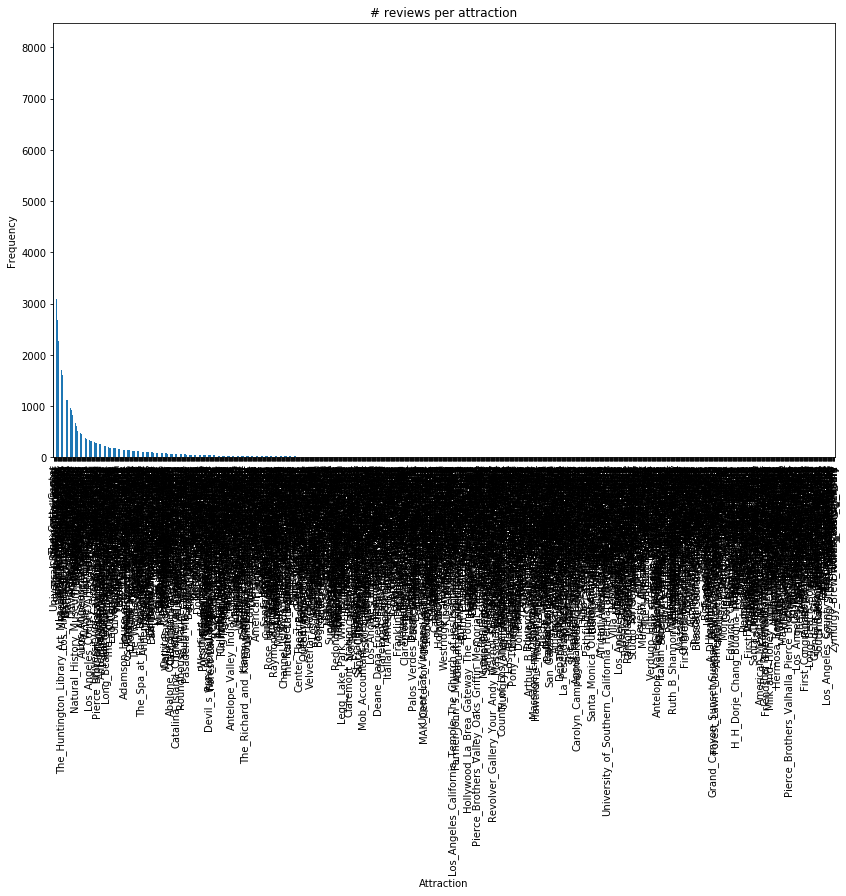

In [42]:
ax = test3['attraction'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="# reviews per attraction")
ax.set_xlabel("Attraction")
ax.set_ylabel("Frequency")

In [47]:
#export to csv
test3.to_csv( "../processed/LA_cleaned_combined_reviews.csv", index=False, encoding='utf-8-sig')

217827

146102

In [21]:
#test

In [ ]:
#now aggregate the reviews

In [4]:
test3 = pd.read_csv("../processed/LA_cleaned_combined_reviews.csv", index_col=None)
test3

attraction  \
0                          The_Getty_Center   
1                          Ahmanson_Theatre   
2                        Airport_in_the_Sky   
3                    Hollywood_Walk_of_Fame   
4                    Catalina_Island_Casino   
...                                     ...   
126463                          Rodeo_Drive   
126464  Off_Track_Betting_at_Hollywood_Park   
126465               Third_Street_Promenade   
126466                    Santa_Monica_Pier   
126467                            The_Grove   

                                                  english  
0       accidentally press wrong key get review page d...  
1       proud good wife go see theater production prou...  
2       airport top world go tour catalina island last...  
3       exciting crowded walk street hollywood think s...  
4       historic casino casino wife go catalina island...  
...                                                   ...  
126463  nice street find high end brand enjoy la lifes...  
126464  become whatever want become become hollywood p...  
126465  love place mainly lot shop even walk around we...  
126466  interesting collection people wonderful place ...  
126467  great outside mall great store restaurant foun...  

[126468 rows x 2 columns]

In [5]:
test3[['attraction', 'english']].groupby(['attraction']).agg(['count'])
#test3.sort_values(by='english count', ascending=False)
#want to drop reviews above certain threshold #https://stackoverflow.com/questions/42966813/pandas-dataframe-to-drop-rows-in-the-groupby
#https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving
#https://stackoverflow.com/questions/56692408/how-to-limit-the-amount-of-rows-in-a-groupby-by-condition-in-pandas

english
                                   count
attraction                              
24th_Street_Theatre                    1
26_Mile_Bike_Path                    942
6_Star_Villa_Foot_Spa                  1
849_Building                           1
AMC_Glendora_12                        4
...                                  ...
Zimmer_Children_s_Museum              11
Zombie_Joe_s_Underground_Theatre       4
Zuma_Beach                           438
Zuma_and_Trancas_Canyons              10
Zymurgy_Brew_Works_Tasting_Room        1

[1398 rows x 1 columns]

In [6]:
pd.options.display.max_colwidth = 100
test3['english'] = test3['english'].astype(str)

In [7]:
test3['english'] = test3[['attraction','english']].groupby(['attraction'])['english'].transform(lambda x: ' '.join(x))


In [8]:
test4=test3[['attraction','english']].drop_duplicates(subset='attraction').reset_index(drop=True)

test4

attraction  \
0                The_Getty_Center   
1                Ahmanson_Theatre   
2              Airport_in_the_Sky   
3          Hollywood_Walk_of_Fame   
4          Catalina_Island_Casino   
...                           ...   
1393            Carnival_Foot_Spa   
1394  Children_s_Nature_Institute   
1395    Zen_Center_of_Los_Angeles   
1396      Avant_Relaxology_Center   
1397                  KP_Projects   

                                                                                                  english  
0     accidentally press wrong key get review page despite press cancel key time art consume emotional...  
1     proud good wife go see theater production proud theater story life time temptation temptation hi...  
2     airport top world go tour catalina island last hour end top island airport sky locate get top fe...  
3     exciting crowded walk street hollywood think street well location whelm say least high point see...  
4     historic casino casino wife go catalina island casino think go see casino know play slot machine...  
...                                                                                                   ...  
1393  affordable well spend money full body massage head back arm leg body foot private room really go...  
1394  guide hike environmental educator love go organize always find new special place learn sensitive...  
1395  get visit check calendar section web site pick schedule period arrive min early stroll small lov...  
1396  highly excellent service offer different service accord need people work excellent service excel...  
1397  super experience simply one good gallery town love art love share lucky enough meet merry knowle...  

[1398 rows x 2 columns]

In [10]:
#test4.replace("nan", "NaN")
#test4.dropna(subset = ["english"])
#test4
import numpy as np
test4.replace(["nan"], np.nan, inplace = True)
test4 = test4.dropna()
test4 = test4.drop_duplicates(subset='attraction', keep="first")
test4

/home/matthew/anaconda3/envs/insight/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


attraction  \
0                The_Getty_Center   
1                Ahmanson_Theatre   
2              Airport_in_the_Sky   
3          Hollywood_Walk_of_Fame   
4          Catalina_Island_Casino   
...                           ...   
1393            Carnival_Foot_Spa   
1394  Children_s_Nature_Institute   
1395    Zen_Center_of_Los_Angeles   
1396      Avant_Relaxology_Center   
1397                  KP_Projects   

                                                                                                  english  
0     accidentally press wrong key get review page despite press cancel key time art consume emotional...  
1     proud good wife go see theater production proud theater story life time temptation temptation hi...  
2     airport top world go tour catalina island last hour end top island airport sky locate get top fe...  
3     exciting crowded walk street hollywood think street well location whelm say least high point see...  
4     historic casino casino wife go catalina island casino think go see casino know play slot machine...  
...                                                                                                   ...  
1393  affordable well spend money full body massage head back arm leg body foot private room really go...  
1394  guide hike environmental educator love go organize always find new special place learn sensitive...  
1395  get visit check calendar section web site pick schedule period arrive min early stroll small lov...  
1396  highly excellent service offer different service accord need people work excellent service excel...  
1397  super experience simply one good gallery town love art love share lucky enough meet merry knowle...  

[1396 rows x 2 columns]

In [13]:
test4=test4[~test4.attraction.str.contains(" ")]
len(test4)

1396

In [63]:
test4.to_csv( "../../data/processed/LA_review_corpora.csv", index=False, encoding='utf-8-sig')

138044

In [ ]:
# combine data to make recommendations with picture, link, etc. 

In [14]:
os.chdir("/home/matthew/anaconda3/envs/insight/staycationLA/data/raw")
extension = 'csv'
all_filenames = [i for i in glob.glob('recdata_LA_*.{}'.format(extension))]
len(all_filenames)

1706

In [15]:
#combine all files in the list
li = []

for filename in all_filenames:
    df = pd.read_csv(filename, index_col=None, names=['TA_url', 'rating', 'gps', 'url', 'type', 'name', 'reviews', 'pic'])
    li.append(df)

complete = pd.concat(li, axis=0, ignore_index=True)
complete = complete.drop_duplicates()
complete.url.fillna(complete.TA_url, inplace=True)
len(complete)

1528

In [16]:
complete['TA_url2'] = complete.TA_url
complete['TA_url2'] = complete['TA_url2'].str.split('-').str[4]
complete

TA_url  \
0     https://www.tripadvisor.com/Attraction_Review-g32911-d18381112-Reviews-Animanga-Pomona_Californi...   
1     https://www.tripadvisor.com/Attraction_Review-g32655-d15573475-Reviews-Statue_of_King_Carlos_III...   
2     https://www.tripadvisor.com/Attraction_Review-g33049-d8592537-Reviews-Santa_Fe_Springs_Swap_Meet...   
3     https://www.tripadvisor.com/Attraction_Review-g32655-d15579106-Reviews-Father_Serra_Park-Los_Ang...   
4     https://www.tripadvisor.com/Attraction_Review-g32580-d4590055-Reviews-Starplex_Cinema-La_Mirada_...   
...                                                                                                   ...   
1699  https://www.tripadvisor.com/Attraction_Review-g32740-d9583059-Reviews-Once_Upon_A_Time_Bookstore...   
1701  https://www.tripadvisor.com/Attraction_Review-g32422-d1830008-Reviews-Grand_Canyon_Sunset_Sunris...   
1702  https://www.tripadvisor.com/Attraction_Review-g32607-d3625279-Reviews-Lancaster_Jethawks-Lancast...   
1703  https://www.tripadvisor.com/Attraction_Review-g32655-d144145-Reviews-University_of_California_Lo...   
1704  https://www.tripadvisor.com/Attraction_Review-g32655-d560732-Reviews-849_Building-Los_Angeles_Ca...   

     rating                           gps  \
0        45  [('34.08518', '-117.76577')]   
1        35  [('34.04249', '-118.25141')]   
2        35     [('33.89', '-118.03456')]   
3        30  [('34.055977', '-118.2384')]   
4        40  [('33.89872', '-118.00525')]   
...     ...                           ...   
1699     50  [('34.20534', '-118.22771')]   
1701     50  [('33.88514', '-118.31092')]   
1702     45   [('34.7021', '-118.17482')]   
1703     45  [('34.05028', '-118.44613')]   
1704     45  [('34.04277', '-118.25622')]   

                                                                                                      url  \
0                                                                             http://www.animangausa.com/   
1     https://www.tripadvisor.com/Attraction_Review-g32655-d15573475-Reviews-Statue_of_King_Carlos_III...   
2                                                                                 http://sfsswapmeet.com/   
3                                                           http://www.laparks.org/park/los-angeles-plaza   
4                              http://www.movieticketsandshowtimes.com/starplex-cinemas/movietheaterchain   
...                                                                                                   ...   
1699                                                                    http://www.shoponceuponatime.com/   
1701                                                                       http://www.tsubasa-travel.com/   
1702                                                                             http://www.jethawks.com/   
1703                                                                                 http://www.ucla.edu/   
1704  https://www.tripadvisor.com/Attraction_Review-g32655-d560732-Reviews-849_Building-Los_Angeles_Ca...   

                         type  \
0             Cultural Events   
1         Monuments & Statues   
2       Flea & Street Markets   
3                       Parks   
4              Movie Theaters   
...                       ...   
1699   Gift & Specialty Shops   
1701  Nature & Wildlife Tours   
1702        Arenas & Stadiums   
1703        Educational sites   
1704  Architectural Buildings   

                                                                name  \
0                                                           Animanga   
1                                          Statue of King Carlos III   
2                                         Santa Fe Springs Swap Meet   
3                                                  Father Serra Park   
4                                                    Starplex Cinema   
...                                                              ...   
1699                                   

In [17]:
complete['pic'] = complete['pic'].str.replace('background-image: url', '')
complete['pic'] = complete['pic'].str.replace('background-image: none; background-size: cover; border-radius: 5px; height: 77px; width: 82px;', '')
complete['pic'] = complete['pic'].str.replace('; background-size: cover; height: 100%; width: 100%;', '')
complete['pic'] = complete['pic'].str.replace('background-image: none; background-size: cover; height: 100%; padding: 0px 0px 60%; width: 100%;', '')
complete['pic'] = complete['pic'].str.replace('\(', '')
complete['pic'] = complete['pic'].str.replace('\)', '')
complete['pic'] = complete['pic'].str.replace('\"', '')
complete = complete.rename(columns={"TA_url2": "attraction"})
#pd.options.display.max_colwidth = 200
#pd.options.display.max_colwidth = 50
#complete

In [18]:
complete['num_reviews'] = complete['reviews']
complete['num_reviews'] = complete['num_reviews'].str.replace(' Review', '')
complete['num_reviews'] = complete['num_reviews'].str.replace(' review', '')
complete['num_reviews'] = complete['num_reviews'].str.replace(',', '')
complete.num_reviews.fillna(complete.reviews, inplace=True)
complete = complete.drop(['reviews'], axis=1)
complete

TA_url  \
0     https://www.tripadvisor.com/Attraction_Review-g32911-d18381112-Reviews-Animanga-Pomona_Californi...   
1     https://www.tripadvisor.com/Attraction_Review-g32655-d15573475-Reviews-Statue_of_King_Carlos_III...   
2     https://www.tripadvisor.com/Attraction_Review-g33049-d8592537-Reviews-Santa_Fe_Springs_Swap_Meet...   
3     https://www.tripadvisor.com/Attraction_Review-g32655-d15579106-Reviews-Father_Serra_Park-Los_Ang...   
4     https://www.tripadvisor.com/Attraction_Review-g32580-d4590055-Reviews-Starplex_Cinema-La_Mirada_...   
...                                                                                                   ...   
1699  https://www.tripadvisor.com/Attraction_Review-g32740-d9583059-Reviews-Once_Upon_A_Time_Bookstore...   
1701  https://www.tripadvisor.com/Attraction_Review-g32422-d1830008-Reviews-Grand_Canyon_Sunset_Sunris...   
1702  https://www.tripadvisor.com/Attraction_Review-g32607-d3625279-Reviews-Lancaster_Jethawks-Lancast...   
1703  https://www.tripadvisor.com/Attraction_Review-g32655-d144145-Reviews-University_of_California_Lo...   
1704  https://www.tripadvisor.com/Attraction_Review-g32655-d560732-Reviews-849_Building-Los_Angeles_Ca...   

     rating                           gps  \
0        45  [('34.08518', '-117.76577')]   
1        35  [('34.04249', '-118.25141')]   
2        35     [('33.89', '-118.03456')]   
3        30  [('34.055977', '-118.2384')]   
4        40  [('33.89872', '-118.00525')]   
...     ...                           ...   
1699     50  [('34.20534', '-118.22771')]   
1701     50  [('33.88514', '-118.31092')]   
1702     45   [('34.7021', '-118.17482')]   
1703     45  [('34.05028', '-118.44613')]   
1704     45  [('34.04277', '-118.25622')]   

                                                                                                      url  \
0                                                                             http://www.animangausa.com/   
1     https://www.tripadvisor.com/Attraction_Review-g32655-d15573475-Reviews-Statue_of_King_Carlos_III...   
2                                                                                 http://sfsswapmeet.com/   
3                                                           http://www.laparks.org/park/los-angeles-plaza   
4                              http://www.movieticketsandshowtimes.com/starplex-cinemas/movietheaterchain   
...                                                                                                   ...   
1699                                                                    http://www.shoponceuponatime.com/   
1701                                                                       http://www.tsubasa-travel.com/   
1702                                                                             http://www.jethawks.com/   
1703                                                                                 http://www.ucla.edu/   
1704  https://www.tripadvisor.com/Attraction_Review-g32655-d560732-Reviews-849_Building-Los_Angeles_Ca...   

                         type  \
0             Cultural Events   
1         Monuments & Statues   
2       Flea & Street Markets   
3                       Parks   
4              Movie Theaters   
...                       ...   
1699   Gift & Specialty Shops   
1701  Nature & Wildlife Tours   
1702        Arenas & Stadiums   
1703        Educational sites   
1704  Architectural Buildings   

                                                                name  \
0                                                           Animanga   
1                                          Statue of King Carlos III   
2                                         Santa Fe Springs Swap Meet   
3                                                  Father Serra Park   
4                                                    Starplex Cinema   
...                                                              ...   
1699                                   

In [209]:
# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
#pd.set_option('display.max_rows', None)
#complete2=complete['type'].value_counts()
#print(complete2)
#pd.set_option('display.max_rows', 10) #reset default

In [19]:
complete2 = complete[~complete.type.str.contains('Taxis & Shuttles')]
complete3 = complete2[~complete2.type.str.contains("Mass Transportation Systems")]
complete4 = complete3[~complete3.type.str.contains('Airport Shops')]
complete4 = complete4[~complete4.type.str.contains('Airport Lounges')]
complete4 = complete4[~complete4.type.str.contains('Department Stores')]
complete4 = complete4[~complete4.type.str.contains('Health/Fitness Clubs & Gyms')]
complete4 = complete4[~complete4.type.str.contains('Other Food & Drink')]
complete4 = complete4[~complete4.type.str.contains('Factory Outlets')]
complete4 = complete4[~complete4.type.str.contains('Bus Transportation')]
complete4 = complete4[~complete4.type.str.contains('Shopping Malls')]

pd.set_option('display.max_rows', None)
complete5=complete4['type'].value_counts()
print(complete5)
pd.set_option('display.max_rows', 10) #reset default

Points of Interest & Landmarks        182
Specialty Museums                     105
Theaters                               99
Parks                                  90
Art Galleries                          60
Historic Sites                         58
Bars & Clubs                           43
Spas                                   39
Beaches                                37
Gift & Specialty Shops                 35
Breweries                              34
Art Museums                            34
Neighborhoods                          31
Architectural Buildings                30
Nature & Wildlife Areas                25
Hiking Trails                          20
Movie Theaters                         20
Libraries                              17
Game & Entertainment Centers           16
Cemeteries                             16
Flea & Street Markets                  15
History Museums                        15
Wineries & Vineyards                   15
Gardens                           

In [20]:
len(complete)

1528

In [21]:
len(complete4)

1473

In [26]:
#complete4[~complete4.attraction.str.contains(" ")]
complete4 = complete4.drop_duplicates(subset='attraction', keep='first')
len(complete4)

1465

In [27]:
complete4[complete4['attraction'].isnull()] #check for NaNs

Empty DataFrame
Columns: [TA_url, rating, gps, url, type, name, pic, attraction, num_reviews]
Index: []

In [28]:
complete4.to_csv( "../../data/processed/LA_recc_data.csv", index=False, encoding='utf-8-sig')

In [3]:
complete4 = pd.read_csv("../processed/LA_recc_data.csv", index_col=None)
len(complete4)

1465

In [4]:
reviews = pd.read_csv("../processed/LA_review_corpora.csv", index_col=None)
reviews

attraction  \
0                The_Getty_Center   
1                Ahmanson_Theatre   
2              Airport_in_the_Sky   
3          Hollywood_Walk_of_Fame   
4          Catalina_Island_Casino   
...                           ...   
1391            Carnival_Foot_Spa   
1392  Children_s_Nature_Institute   
1393    Zen_Center_of_Los_Angeles   
1394      Avant_Relaxology_Center   
1395                  KP_Projects   

                                                english  
0     accidentally press wrong key get review page d...  
1     proud good wife go see theater production prou...  
2     airport top world go tour catalina island last...  
3     exciting crowded walk street hollywood think s...  
4     historic casino casino wife go catalina island...  
...                                                 ...  
1391  affordable well spend money full body massage ...  
1392  guide hike environmental educator love go orga...  
1393  get visit check calendar section web site pick...  
1394  highly excellent service offer different servi...  
1395  super experience simply one good gallery town ...  

[1396 rows x 2 columns]

In [5]:
#reviews["attraction"] = reviews["attraction"].replace(" ", "_")
complete4['attraction'] = complete4['attraction'].str.replace('LA_', '')
complete4['attraction'] = complete4['attraction'].str.replace('_url', '')

In [6]:
#join the two dfs
result = pd.merge(left=reviews, right=complete4, left_on='attraction', right_on='attraction')
pd.options.display.max_colwidth = 50
result

attraction  \
0                The_Getty_Center   
1                Ahmanson_Theatre   
2              Airport_in_the_Sky   
3          Hollywood_Walk_of_Fame   
4          Catalina_Island_Casino   
...                           ...   
1330            Carnival_Foot_Spa   
1331  Children_s_Nature_Institute   
1332    Zen_Center_of_Los_Angeles   
1333      Avant_Relaxology_Center   
1334                  KP_Projects   

                                                english  \
0     accidentally press wrong key get review page d...   
1     proud good wife go see theater production prou...   
2     airport top world go tour catalina island last...   
3     exciting crowded walk street hollywood think s...   
4     historic casino casino wife go catalina island...   
...                                                 ...   
1330  affordable well spend money full body massage ...   
1331  guide hike environmental educator love go orga...   
1332  get visit check calendar section web site pick...   
1333  highly excellent service offer different servi...   
1334  super experience simply one good gallery town ...   

                                                 TA_url  rating  \
0     https://www.tripadvisor.com/Attraction_Review-...      50   
1     https://www.tripadvisor.com/Attraction_Review-...      45   
2     https://www.tripadvisor.com/Attraction_Review-...      45   
3     https://www.tripadvisor.com/Attraction_Review-...      35   
4     https://www.tripadvisor.com/Attraction_Review-...      45   
...                                                 ...     ...   
1330  https://www.tripadvisor.com/Attraction_Review-...      35   
1331  https://www.tripadvisor.com/Attraction_Review-...      50   
1332  https://www.tripadvisor.com/Attraction_Review-...      50   
1333  https://www.tripadvisor.com/Attraction_Review-...      50   
1334  https://www.tripadvisor.com/Attraction_Review-...      50   

                                 gps  \
0     [('34.077564', '-118.474625')]   
1      [('34.058132', '-118.24752')]   
2     [('33.402744', '-118.414856')]   
3        [('34.1016', '-118.32672')]   
4      [('33.348835', '-118.32579')]   
...                              ...   
1330    [('33.78943', '-118.31252')]   
1331    [('34.03363', '-118.47174')]   
1332    [('34.05505', '-118.30011')]   
1333    [('33.98612', '-117.90134')]   
1334    [('34.08294', '-118.34426')]   

                                                    url  \
0                     http://www.getty.edu/visit/center   
1                       http://www.ahmansontheatre.net/   
2     http://www.catalinaconservancy.org/index.php?s...   
3                            http://www.walkoffame.com/   
4     http://www.visitcatalinaisland.com/activities-...   
...                                                 ...   
1330                               http://carnival.com/   
1331  https://www.tripadvisor.com/Attraction_Review-...   
1332  https://www.tripadvisor.com/Attraction_Review-...   
1333  https://www.tripadvisor.com/Attraction_Review-...   
1334  https://www.tripadvisor.com/Attractions-g32655...   

                                type                         name  \
0                  Specialty Museums             The Getty Center   
1                           Theaters             Ahmanson Theatre   
2     Points of Interest & Landmarks           Airport in the Sky   
3     Points of Interest & Landmarks       Hollywood Walk of Fame   
4                            Casinos       Catalina Island Casino   
...                              ...                          ...   
1330                            Spas            Carnival Foot Spa   
1331              Children's Museums  Children's Nature Institute   
1332        Sacred & Religious Sites    Zen Center of Los Angeles   
1333                            Spas      Avant Relaxology Center   
1334                   Art Galleries                  KP Projects   

                                             

In [7]:
#check which rows are not in both dataframes: these are all types of attractions that I don't want anyway (eg only 1 review, shopping malls, etc.)

In [8]:
reviews[(~reviews.attraction.isin(result.attraction))&(~complete4.attraction.isin(result.attraction))]

<ipython-input-8-8a7214144c73>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reviews[(~reviews.attraction.isin(result.attraction))&(~complete4.attraction.isin(result.attraction))]


attraction  \
748                 Beautycon   
1215                  GoSedan   
1295  Skechers_Factory_Outlet   
1379                 Platform   

                                                english  
748   fun go vip route first vip ticket short line g...  
1215  excellent service rarely write review give neg...  
1295  want place visit big fan owner several pair sh...  
1379  upscale neighbourhood nice place chill blue bo...

In [9]:
complete4[(~reviews.attraction.isin(result.attraction))&(~complete4.attraction.isin(result.attraction))]

TA_url  rating  \
748   https://www.tripadvisor.com/Attraction_Review-...      30   
1215  https://www.tripadvisor.com/Attraction_Review-...      30   
1295  https://www.tripadvisor.com/Attraction_Review-...      50   
1379  https://www.tripadvisor.com/Attraction_Review-...      50   

                                gps  \
748    [('34.05684', '-118.23831')]   
1215   [('34.04515', '-117.96268')]   
1295   [('34.07511', '-118.34369')]   
1379  [('34.101677', '-118.34363')]   

                                                    url  \
748   https://www.tripadvisor.com/Attraction_Review-...   
1215  http://griffithobservatory.org/exhibits/sunset...   
1295  https://www.tripadvisor.com/Attractions-g32655...   
1379  http://business.hollywoodchamber.net/list/memb...   

                                type                             name  \
748                   Historic Sites                  Turner building   
1215  Points of Interest & Landmarks  Sunset and Moonset Radial Lines   
1295                   Art Galleries                    Apex Fine Art   
1379  Points of Interest & Landmarks       BHStar-Be A Hollywood Star   

                                                    pic  \
748                                                 NaN   
1215                                                NaN   
1295                                                NaN   
1379  https://dynamic-media-cdn.tripadvisor.com/medi...   

                           attraction  num_reviews  
748                   Turner_building            1  
1215  Sunset_and_Moonset_Radial_Lines            1  
1295                    Apex_Fine_Art            1  
1379       BHStar_Be_A_Hollywood_Star            1

In [10]:
result['num_reviews'] = result['num_reviews'].astype('int')

In [11]:
result['ranking'] = result['num_reviews'].rank(method='dense', ascending=False).astype(int)
result

attraction  \
0                The_Getty_Center   
1                Ahmanson_Theatre   
2              Airport_in_the_Sky   
3          Hollywood_Walk_of_Fame   
4          Catalina_Island_Casino   
...                           ...   
1330            Carnival_Foot_Spa   
1331  Children_s_Nature_Institute   
1332    Zen_Center_of_Los_Angeles   
1333      Avant_Relaxology_Center   
1334                  KP_Projects   

                                                english  \
0     accidentally press wrong key get review page d...   
1     proud good wife go see theater production prou...   
2     airport top world go tour catalina island last...   
3     exciting crowded walk street hollywood think s...   
4     historic casino casino wife go catalina island...   
...                                                 ...   
1330  affordable well spend money full body massage ...   
1331  guide hike environmental educator love go orga...   
1332  get visit check calendar section web site pick...   
1333  highly excellent service offer different servi...   
1334  super experience simply one good gallery town ...   

                                                 TA_url  rating  \
0     https://www.tripadvisor.com/Attraction_Review-...      50   
1     https://www.tripadvisor.com/Attraction_Review-...      45   
2     https://www.tripadvisor.com/Attraction_Review-...      45   
3     https://www.tripadvisor.com/Attraction_Review-...      35   
4     https://www.tripadvisor.com/Attraction_Review-...      45   
...                                                 ...     ...   
1330  https://www.tripadvisor.com/Attraction_Review-...      35   
1331  https://www.tripadvisor.com/Attraction_Review-...      50   
1332  https://www.tripadvisor.com/Attraction_Review-...      50   
1333  https://www.tripadvisor.com/Attraction_Review-...      50   
1334  https://www.tripadvisor.com/Attraction_Review-...      50   

                                 gps  \
0     [('34.077564', '-118.474625')]   
1      [('34.058132', '-118.24752')]   
2     [('33.402744', '-118.414856')]   
3        [('34.1016', '-118.32672')]   
4      [('33.348835', '-118.32579')]   
...                              ...   
1330    [('33.78943', '-118.31252')]   
1331    [('34.03363', '-118.47174')]   
1332    [('34.05505', '-118.30011')]   
1333    [('33.98612', '-117.90134')]   
1334    [('34.08294', '-118.34426')]   

                                                    url  \
0                     http://www.getty.edu/visit/center   
1                       http://www.ahmansontheatre.net/   
2     http://www.catalinaconservancy.org/index.php?s...   
3                            http://www.walkoffame.com/   
4     http://www.visitcatalinaisland.com/activities-...   
...                                                 ...   
1330                               http://carnival.com/   
1331  https://www.tripadvisor.com/Attraction_Review-...   
1332  https://www.tripadvisor.com/Attraction_Review-...   
1333  https://www.tripadvisor.com/Attraction_Review-...   
1334  https://www.tripadvisor.com/Attractions-g32655...   

                                type                         name  \
0                  Specialty Museums             The Getty Center   
1                           Theaters             Ahmanson Theatre   
2     Points of Interest & Landmarks           Airport in the Sky   
3     Points of Interest & Landmarks       Hollywood Walk of Fame   
4                            Casinos       Catalina Island Casino   
...                              ...                          ...   
1330                            Spas            Carnival Foot Spa   
1331              Children's Museums  Children's Nature Institute   
1332        Sacred & Religious Sites    Zen Center of Los Angeles   
1333                            Spas      Avant Relaxology Center   
1334                   Art Galleries                  KP Projects   

                                             

In [12]:
result2=result.sort_values(by=['ranking'])
result2.head(10)

attraction  \
21  Universal_Studios_Hollywood   
27         Griffith_Observatory   
7             Santa_Monica_Pier   
3        Hollywood_Walk_of_Fame   
0              The_Getty_Center   
16                 Venice_Beach   
11               Hollywood_Sign   
6      Santa_Monica_State_Beach   
39                  Rodeo_Drive   
8              Santa_Monica_Bay   

                                              english  \
21  front line must family universal orlando la do...   
27  griffith observatory another must see landmark...   
7   end mother road must trip la pier iconic part ...   
3   exciting crowded walk street hollywood think s...   
0   accidentally press wrong key get review page d...   
16  crazy think crazy good way street entertainer ...   
11  beautiful landmark definitely must visit la si...   
6   santa beach beach long shore broad walk crowd ...   
39  pretty shop super exclusive luxury shopping he...   
8   wonderfully relax view lot activity family als...   

                                               TA_url  rating  \
21  https://www.tripadvisor.com/Attraction_Review-...      45   
27  https://www.tripadvisor.com/Attraction_Review-...      45   
7   https://www.tripadvisor.com/Attraction_Review-...      40   
3   https://www.tripadvisor.com/Attraction_Review-...      35   
0   https://www.tripadvisor.com/Attraction_Review-...      50   
16  https://www.tripadvisor.com/Attraction_Review-...      40   
11  https://www.tripadvisor.com/Attraction_Review-...      40   
6   https://www.tripadvisor.com/Attraction_Review-...      45   
39  https://www.tripadvisor.com/Attraction_Review-...      40   
8   https://www.tripadvisor.com/Attraction_Review-...      45   

                               gps  \
21   [('34.138416', '-118.35337')]   
27   [('34.118492', '-118.30039')]   
7     [('34.01038', '-118.49594')]   
3      [('34.1016', '-118.32672')]   
0   [('34.077564', '-118.474625')]   
16   [('33.985912', '-118.47328')]   
11   [('34.134113', '-118.32154')]   
6      [('34.0114', '-118.49491')]   
39    [('34.06983', '-118.40366')]   
8    [('34.008915', '-118.49732')]   

                                                  url  \
21          http://www.universalstudioshollywood.com/   
27                http://www.griffithobservatory.org/   
7                         http://santamonicapier.org/   
3                          http://www.walkoffame.com/   
0                   http://www.getty.edu/visit/center   
16  https://www.tripadvisor.com/Attraction_Review-...   
11  http://www.visitcalifornia.com/attraction/holl...   
6                  http://www.smgov.net/portals/beach   
39  http://www.beverlyhills.org/exploring/beverlyh...   
8   https://www.tripadvisor.com/Attraction_Review-...   

                              type                         name  \
21                     Theme Parks  Universal Studios Hollywood   
27    Observatories & Planetariums         Griffith Observatory   
7   Points of Interest & Landmarks            Santa Monica Pier   
3   Points of Interest & Landmarks       Hollywood Walk of Fame   
0                Specialty Museums             The Getty Center   
16                         Beaches                 Venice Beach   
11  Points of Interest & Landmarks               Hollywood Sign   
6                      State Parks     Santa Monica State Beach   
39  Points of Interest & Landmarks                  Rodeo Drive   
8                  Bodies of Water             Santa Monica Bay   

                                                  pic  num_reviews  ranking  
21  https://dynamic-media-cdn.tripadvisor.com/medi...        36470        1  
27  https://dynamic-media-cdn.tripadvisor.com/medi...        20247        2  
7   https://dynamic-media-cdn.tripadvisor.com/medi...        18866        3  
3   https://dynamic-media-cdn.tripadvisor.com/medi...        17542        4  
0   https://dynamic-media-cdn.tripadvisor.com/medi...        14503        5  
16  https://dynamic-media-cdn.tripadvi

In [13]:
#add html to make it easy to import results into flask website
result2['pic'] = "<img class='img-responsive' src='" + result2['pic'].astype(str) + "'>"
result2['name'] = "<a  href='" + result2['TA_url'].astype(str) + "'>" + result2['name'].astype(str) + "</a>"
result2['rating'] = result2['rating']/10
result2['ranking'] = "#" + result2['ranking'].astype(str)
result2

attraction  \
21         Universal_Studios_Hollywood   
27                Griffith_Observatory   
7                    Santa_Monica_Pier   
3               Hollywood_Walk_of_Fame   
0                     The_Getty_Center   
...                                ...   
939   Public_Art_You_Are_Not_Forgotten   
1223      Mulholland_Memorial_Fountain   
1224                      Hermit_Falls   
1215      Ancient_Thai_Massage_and_Spa   
1334                       KP_Projects   

                                                english  \
21    front line must family universal orlando la do...   
27    griffith observatory another must see landmark...   
7     end mother road must trip la pier iconic part ...   
3     exciting crowded walk street hollywood think s...   
0     accidentally press wrong key get review page d...   
...                                                 ...   
939   powerful block inland beach art installation w...   
1223  bring water city dry apt monument man remarkab...   
1224  hermit fall go lot close house easy take santa...   
1215  great place de stress love go place area go ye...   
1334  super experience simply one good gallery town ...   

                                                 TA_url  rating  \
21    https://www.tripadvisor.com/Attraction_Review-...     4.5   
27    https://www.tripadvisor.com/Attraction_Review-...     4.5   
7     https://www.tripadvisor.com/Attraction_Review-...     4.0   
3     https://www.tripadvisor.com/Attraction_Review-...     3.5   
0     https://www.tripadvisor.com/Attraction_Review-...     5.0   
...                                                 ...     ...   
939   https://www.tripadvisor.com/Attraction_Review-...     4.0   
1223  https://www.tripadvisor.com/Attraction_Review-...     5.0   
1224  https://www.tripadvisor.com/Attraction_Review-...     5.0   
1215  https://www.tripadvisor.com/Attraction_Review-...     5.0   
1334  https://www.tripadvisor.com/Attraction_Review-...     5.0   

                                 gps  \
21     [('34.138416', '-118.35337')]   
27     [('34.118492', '-118.30039')]   
7       [('34.01038', '-118.49594')]   
3        [('34.1016', '-118.32672')]   
0     [('34.077564', '-118.474625')]   
...                              ...   
939     [('33.99334', '-118.47675')]   
1223      [('34.117', '-118.27169')]   
1224                              []   
1215    [('34.02695', '-117.89633')]   
1334    [('34.08294', '-118.34426')]   

                                                    url  \
21            http://www.universalstudioshollywood.com/   
27                  http://www.griffithobservatory.org/   
7                           http://santamonicapier.org/   
3                            http://www.walkoffame.com/   
0                     http://www.getty.edu/visit/center   
...                                                 ...   
939   https://www.tripadvisor.com/Attractions-g32655...   
1223  http://waterandpower.org/museum/Mulholland_Mon...   
1224  https://www.tripadvisor.com/Attraction_Review-...   
1215                  http://ancientthaispamassage.com/   
1334  https://www.tripadvisor.com/Attractions-g32655...   

                                type  \
21                       Theme Parks   
27      Observatories & Planetariums   
7     Points of Interest & Landmarks   
3     Points of Interest & Landmarks   
0                  Specialty Museums   
...                              ...   
939                    Art Galleries   
1223  Points of Interest & Landmarks   
1224                      Waterfalls   
1215                            Spas   
1334                   Art Galleries   

                                                   name  \
21    <a  href='https://www.tripadvisor.com/Attracti...   
27    <a  href='https://www.tripadvisor.com/Attracti...   
7     <a  href='https://www.tripadvisor.com/Attracti...   
3     <a  href='https://www.tripadvisor.com/Attracti...   
0     <a  href='https://www.tripadvisor.com

In [14]:
#export to csv
result2.to_csv( "../processed/LA_final_corpora.csv", index=False, encoding='utf-8-sig')

In [89]:
#pip install fuzzywuzzy[speedup]
def fuzzy_merge(df_1, df_2, key1, key2, threshold=90, limit=2):
    """
    :param df_1: the left table to join
    :param df_2: the right table to join
    :param key1: key column of the left table
    :param key2: key column of the right table
    :param threshold: how close the matches should be to return a match, based on Levenshtein distance
    :param limit: the amount of matches that will get returned, these are sorted high to low
    :return: dataframe with boths keys and matches
    """
    s = df_2[key2].tolist()

    m = df_1[key1].apply(lambda x: process.extract(x, s, limit=limit))    
    df_1['matches'] = m

    m2 = df_1['matches'].apply(lambda x: ', '.join([i[0] for i in x if i[1] >= threshold]))
    df_1['matches'] = m2

    return df_1

In [149]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

fuzzy_merge(complete4, reviews, 'attraction', 'attraction', threshold=80)

attraction rating                            gps  \
466                24th_Street_Theatre     40  [('34.034634', '-118.28451')]   
1196                 26_Mile_Bike_Path     45  [('34.003456', '-118.48827')]   
455                444_Flower_Building     30    [('34.05165', '-118.2552')]   
1218                         777_Tower     35   [('34.04844', '-118.26142')]   
1358                      849_Building     45   [('34.04277', '-118.25622')]   
...                                ...    ...                            ...   
871                         Yoga_Madre     45   [('34.16157', '-118.05323')]   
14                           YouRaceLA     45   [('34.10962', '-117.98708')]   
539          Zen_Center_of_Los_Angeles     50   [('34.05505', '-118.30011')]   
1137          Zimmer_Children_s_Museum     40   [('34.06435', '-118.37003')]   
376   Zombie_Joe_s_Underground_Theatre     45   [('34.15909', '-118.37081')]   

                                                    url  \
466                              http://24thstreet.org/   
1196  http://beaches.lacounty.gov/wps/portal/dbh/!ut...   
455   https://www.tripadvisor.com/Attraction_Review-...   
1218  https://www.tripadvisor.com/Attraction_Review-...   
1358  https://www.tripadvisor.com/Attraction_Review-...   
...                                                 ...   
871                               http://yogamadre.com/   
14                                http://youracela.com/   
539   https://www.tripadvisor.com/Attraction_Review-...   
1137                       http://www.zimmermuseum.org/   
376                              http://zombiejoes.com/   

                                type                              name  \
466                         Theaters               24th Street Theatre   
1196                   Biking Trails                 26-Mile Bike Path   
455   Points of Interest & Landmarks               444 Flower Building   
1218  Points of Interest & Landmarks                         777 Tower   
1358         Architectural Buildings                      849 Building   
...                              ...                               ...   
871                   Yoga & Pilates                        Yoga Madre   
14                  Auto Race Tracks                         YouRaceLA   
539         Sacred & Religious Sites         Zen Center of Los Angeles   
1137              Children's Museums          Zimmer Children's Museum   
376                         Theaters  Zombie Joe's Underground Theatre   

                                                    pic num_reviews  \
466   https://dynamic-media-cdn.tripadvisor.com/medi...           1   
1196  https://dynamic-media-cdn.tripadvisor.com/medi...       1,457   
455   https://dynamic-media-cdn.tripadvisor.com/medi...           1   
1218  https://dynamic-media-cdn.tripadvisor.com/medi...           4   
1358  https://dynamic-media-cdn.tripadvisor.com/medi...           2   
...                                                 ...         ...   
871                                                               4   
14    https://dynamic-media-cdn.tripadvisor.com/medi...          17   
539                                                               2   
1137  https://dynamic-media-cdn.tripadvisor.com/medi...          22   
376   https://dynamic-media-cdn.tripadvisor.com/medi...           4   

                                                matches  
466                                 24th_Street_Theatre  
1196                                  26_Mile_Bike_Path  
455                                                      
1218                                                     
1358                                       849_Building  
...                                                 ...  
871                                          Yoga_Madre  
14                                            YouRaceLA  
539                           Zen_Center_of_Los_Angeles  
1137  Zimmer_Children_s_Museum, Kids

In [94]:
pip install jellyfish

     |████████████████████████████████| 94 kB 1.0 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [97]:
import jellyfish
def get_closest_match(x, list_strings):

  best_match = None
  highest_jw = 0

  for current_string in list_strings:
    current_score = jellyfish.jaro_winkler(x, current_string)

    if(current_score > highest_jw):
      highest_jw = current_score
      best_match = current_string

  return best_match


complete4.attraction = complete4.attraction.map(lambda x: get_closest_match(x, reviews.attraction))

reviews.join(complete4)

ValueError: columns overlap but no suffix specified: Index(['attraction'], dtype='object')

In [100]:
complete4

attraction rating  \
0                             Statue_of_King_Carlos_III     35   
1                                     Father_Serra_Park     30   
2                                  Valley_Relics_Museum     45   
3       Legg_Lake_Park_Whittier_Narrows_Recreation_Area     45   
4                                          The_Old_Mill     45   
...                                                 ...    ...   
1199                                 Redondo_Beach_Pier     40   
1202                         Once_Upon_A_Time_Bookstore     50   
1204  Grand_Canyon_Sunset_Sunrise_Day_Tour_Tsubasa_T...     50   
1205          University_of_California_Los_Angeles_UCLA     45   
1206                                       849_Building     45   

                                 gps  \
0       [('34.04249', '-118.25141')]   
1       [('34.055977', '-118.2384')]   
2      [('34.213833', '-118.50038')]   
3     [('34.034805', '-118.053955')]   
4       [('34.11937', '-118.12765')]   
...                              ...   
1199   [('33.839924', '-118.39111')]   
1202    [('34.20534', '-118.22771')]   
1204    [('33.88514', '-118.31092')]   
1205    [('34.05028', '-118.44613')]   
1206    [('34.04277', '-118.25622')]   

                                                    url  \
0     https://www.tripadvisor.com/Attraction_Review-...   
1         http://www.laparks.org/park/los-angeles-plaza   
2                    http://www.valleyrelicsmuseum.org/   
3     http://parks.lacounty.gov/wps/portal/dpr/Parks...   
4                              http://www.old-mill.org/   
...                                                 ...   
1199                  http://www.redondopier.com/events   
1202                  http://www.shoponceuponatime.com/   
1204                     http://www.tsubasa-travel.com/   
1205                               http://www.ucla.edu/   
1206  https://www.tripadvisor.com/Attraction_Review-...   

                         type  \
0         Monuments & Statues   
1                       Parks   
2           Specialty Museums   
3                       Parks   
4           Sightseeing Tours   
...                       ...   
1199       Piers & Boardwalks   
1202   Gift & Specialty Shops   
1204  Nature & Wildlife Tours   
1205        Educational sites   
1206  Architectural Buildings   

                                                   name reviews  \
0                             Statue of King Carlos III     NaN   
1                                     Father Serra Park       1   
2                                  Valley Relics Museum     NaN   
3      Legg Lake Park, Whittier Narrows Recreation Area     NaN   
4                                          The Old Mill     NaN   
...                                                 ...     ...   
1199                                 Redondo Beach Pier   1,304   
1202                         Once Upon A Time Bookstore     NaN   
1204  Grand Canyon, Sunset Sunrise Day Tour - Tsubas...     NaN   
1205       University of California, Los Angeles (UCLA)     NaN   
1206                                       849 Building     NaN   

                                                    pic  
0     https://dynamic-media-cdn.tripadvisor.com/medi...  
1     https://dynamic-media-cdn.tripadvisor.com/medi...  
2     https://dynamic-media-cdn.tripadvisor.com/medi...  
3     https://dynamic-media-cdn.tripadvisor.com/medi...  
4                                                   NaN  
...                                                 ...  
1199  https://dynamic-media-cdn.tripadvisor.com/medi...  
1202                                                     
1204                                                NaN  
1205  https://dynamic-media-cdn.tripadvisor.com/medi...  
1206  https://dynamic-media-cdn.tripadvisor.com/medi...  

[1026 rows x 8 columns]

In [147]:
# Sort by date_times used for merge
reviews.sort_values("attraction", inplace=True)
complete4.sort_values("attraction", inplace=True)
pd.merge_asof(reviews, complete4, on='attraction')

TypeError: No matching signature found

In [148]:
s = complete4['attraction'] 
res = reviews[reviews['attraction'].isin(s)]
print(res)

                            attraction  \
780                24th_Street_Theatre   
61                   26_Mile_Bike_Path   
1128                      849_Building   
623                 AMC_Santa_Anita_16   
1163          AMF_Bowling_Square_Lanes   
...                                ...   
655                         Yoga_Madre   
346                          YouRaceLA   
1393         Zen_Center_of_Los_Angeles   
745           Zimmer_Children_s_Museum   
238   Zombie_Joe_s_Underground_Theatre   

                                                english  
780   good production the theater small but intimate...  
61    ride to and beyond if go to can not miss do th...  
1128  also know as eastern building building or east...  
623   clean well maintain nothing out of the ordinar...  
1163  good bowling alley in la if i do not want to g...  
...                                                 ...  
655   cute village yoga studio i m not huge into yog...  
346   a lot of fun the pier be 